In [43]:
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
random.seed(10)

In [18]:
from sklearn import svm


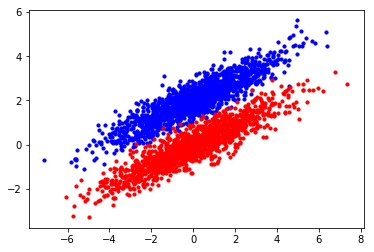

In [32]:
#i.
mi1 = [0,2]
mi2 = [0,0]
cov1 = [[4, 1.8], [1.8, 1]]
cov2 = [[4, 1.8], [1.8, 1]]
cov2_ = [[4, -1.8], [-1.8, 1]]


trei1 = np.random.multivariate_normal(mi1,cov1,1500)
trei2 = np.random.multivariate_normal(mi2,cov2,1500)
trei2_ = np.random.multivariate_normal(mi2,cov2_,1500)

test1 = np.random.multivariate_normal(mi1,cov1,1500)
test2 = np.random.multivariate_normal(mi2,cov2,1500)
test2_ = np.random.multivariate_normal(mi2,cov2_,1500)

treinamento = np.concatenate([trei1, trei2])
teste = np.concatenate([test1, test2])

treinamento_ = np.concatenate([trei1, trei2_])
teste_ = np.concatenate([test1, test2_])

resposta = np.concatenate([np.full(1500,0), np.full(1500,1)])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(trei1[:,0],trei1[:,1], s=10, c='b', marker="o", label='first')
ax1.scatter(trei2[:,0],trei2[:,1], s=10, c='r', marker="o", label='second')
plt.show()




In [36]:
#ii.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

gnb.fit(treinamento,resposta)
accuracy_score(resposta, gnb.predict(teste))

0.8413333333333334

In [39]:
#iii.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(treinamento,resposta)
accuracy_score(resposta, clf.predict(teste))

0.9883333333333333

#iv.

O resultado da regressão linear é muito superior, provavelmente ligado ao fato da distribuição possuir uma matriz de covariancia não diagonal.

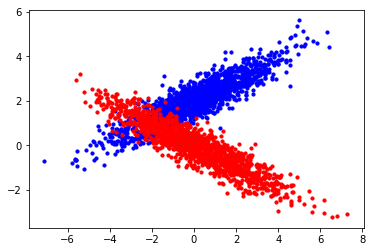

In [40]:
#v.
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(trei1[:,0],trei1[:,1], s=10, c='b', marker="o", label='first')
ax1.scatter(trei2_[:,0],trei2_[:,1], s=10, c='r', marker="o", label='second')
plt.show()

In [41]:
gnb2 = GaussianNB()
gnb2.fit(treinamento_,resposta)
accuracy_score(resposta, gnb2.predict(teste_))

0.8416666666666667

In [42]:
clf2 = LogisticRegression(solver = 'lbfgs')
clf2.fit(treinamento_,resposta)
accuracy_score(resposta, clf2.predict(teste_))

0.8446666666666667

O resultado obtido com a nova matriz de covariancia apresenta uma queda no desempenho da regresão logistica, ligado a existir uma confusão muito maior dos dados. 

In [44]:
grid_param = {
    'C': [0.1,0.2,0.5,1,2,20]
}

clf3 = LogisticRegression(solver = 'lbfgs')

gd_sr = GridSearchCV(estimator=clf3 ,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [47]:
gd_sr.fit()

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
gd_sr.fit(treinamento,resposta)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
gd_sr.score(teste, resposta)

0.9886666666666667

In [57]:
gd_sr.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
           verbose=0, warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'ovr',
 'estimator__n_jobs': 1,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'C': [0.1, 0.2, 0.5, 1, 2, 20]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': 'accuracy',
 'verbose': 0}

De todos os lamdas testados o igual a 1.0 foi o que apresentou mwlhor resultado, demonstrando que a regularização não é necessária
